In [1]:
import sys, os
import pandas as pd

In [2]:
sys.path.append('/media/moraa/New Volume/Ontita/10Academy/Cohort B/Projects/Week1/User_Analytics_in_the_telecommunication_Industry')

from dotenv import load_dotenv
from utils.db_connections import DBConnection

In [ ]:
# Create an instance of DBConnection
db_conn = DBConnection()

# Specify the table name you want to read
table_name = 'xdr_data'

# Read data from the specified table into a DataFrame
df = db_conn.read_table_to_dataframe(table_name)

df.head()

In [3]:
combined_df = handle_missing_values(df)

Experience User Analytics

In [5]:
# Group the dataset by customer identifier
grouped_by_customer = combined_df.groupby('MSISDN/Number')

# Calculate the average TCP retransmission for each customer
average_tcp_retransmission = grouped_by_customer[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean()

# sort the aggregated values
average_tcp_retransmission_sorted = average_tcp_retransmission.sort_values(by=['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], ascending=False)

# Print the aggregated result
print(average_tcp_retransmission_sorted.head(10))  

               TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)
MSISDN/Number                                                          
3.369858e+10                  4.289488e+09                   11989838.0
3.365871e+10                  4.288060e+09                      60496.0
3.366491e+10                  4.268432e+09                     215354.0
3.365863e+10                  4.254644e+09                      15816.0
3.366613e+10                  4.211189e+09                      68802.0
3.366877e+10                  4.166591e+09                       3989.0
3.366131e+10                  4.131046e+09                    6891979.0
3.366240e+10                  4.117753e+09                      51555.0
3.366682e+10                  3.968072e+09                      48174.0
3.376264e+10                  3.785295e+09                    1576179.0


In [6]:
# Group the dataset by customer identifier
grouped_by_customer = combined_df.groupby('MSISDN/Number')

# Calculate the average RTT for each customer
average_rtt = grouped_by_customer[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean()

# sort the aggregated values
average_rtt_sorted = average_rtt.sort_values(by=['Avg RTT DL (ms)', 'Avg RTT UL (ms)'], ascending=False)

# Print the aggregated result
print(average_rtt_sorted.head(10)) 

               Avg RTT DL (ms)  Avg RTT UL (ms)
MSISDN/Number                                  
3.366232e+10           96923.0              1.0
3.368369e+10           54847.0              1.0
3.366087e+10           32333.0              2.0
3.376094e+10           26971.0            307.0
3.360679e+10           26250.0             50.0
3.367182e+10           25602.0            113.0
3.378187e+10           25374.0             14.0
3.378401e+10           24733.0              5.0
3.369855e+10           22961.5             49.0
3.362963e+10           20979.0              1.0


In [7]:
# Group the dataset by customer identifier
grouped_by_customer = combined_df.groupby('MSISDN/Number')

# Retrieve the most frequent handset type for each customer
most_frequent_handset_type = grouped_by_customer['Handset Type'].agg(lambda x: x.mode().iloc[0])

# Print the aggregated result
print(most_frequent_handset_type.head(10))

MSISDN/Number
3.360100e+10                      Huawei P20 Lite Huawei Nova 3E
3.360100e+10                              Apple iPhone 7 (A1778)
3.360100e+10                                           undefined
3.360101e+10                             Apple iPhone 5S (A1457)
3.360101e+10                             Apple iPhone Se (A1723)
3.360101e+10                            Samsung Galaxy A8 (2018)
3.360101e+10    Huawei Mate 10 Pro Porsche Design Huawei Mate 10
3.360101e+10                   Samsung Galaxy S8 Plus (Sm-G955F)
3.360101e+10                                           undefined
3.360102e+10                              Apple iPhone X (A1865)
Name: Handset Type, dtype: object


In [8]:
# Group the dataset by customer identifier
grouped_by_customer = combined_df.groupby('MSISDN/Number')

# Calculate the average throughput for each customer
average_throughput = grouped_by_customer[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()

# Print the aggregated result
print(average_throughput.head(10)) 

               Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)
MSISDN/Number                                                  
3.360100e+10                      37.0                     39.0
3.360100e+10                      48.0                     51.0
3.360100e+10                      48.0                     49.0
3.360101e+10                     204.0                     44.0
3.360101e+10                   20197.5                   8224.5
3.360101e+10                    3761.0                    193.0
3.360101e+10                   20485.5                    771.0
3.360101e+10                     747.0                    500.0
3.360101e+10                      38.5                     56.0
3.360102e+10                      75.0                     71.0


In [10]:
# Top 10 TCP values
top_TCP_values = combined_df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].stack().nlargest(10)
print("Top 10 TCP values:")
print(top_TCP_values)


Top 10 TCP values:
77979   TCP DL Retrans. Vol (Bytes)    4.294426e+09
135678  TCP DL Retrans. Vol (Bytes)    4.291380e+09
34645   TCP DL Retrans. Vol (Bytes)    4.289877e+09
140813  TCP DL Retrans. Vol (Bytes)    4.289488e+09
3782    TCP DL Retrans. Vol (Bytes)    4.288060e+09
119684  TCP DL Retrans. Vol (Bytes)    4.275259e+09
39637   TCP DL Retrans. Vol (Bytes)    4.268432e+09
76990   TCP DL Retrans. Vol (Bytes)    4.259997e+09
59016   TCP DL Retrans. Vol (Bytes)    4.256650e+09
41209   TCP DL Retrans. Vol (Bytes)    4.254644e+09
dtype: float64


In [11]:
# Bottom 10 TCP values
bottom_TCP_values = combined_df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].stack().nsmallest(10)
print("\nBottom 10 TCP values:")
print(bottom_TCP_values)



Bottom 10 TCP values:
13275   TCP UL Retrans. Vol (Bytes)    1.0
15253   TCP UL Retrans. Vol (Bytes)    1.0
36086   TCP UL Retrans. Vol (Bytes)    1.0
38407   TCP UL Retrans. Vol (Bytes)    1.0
75087   TCP UL Retrans. Vol (Bytes)    1.0
78703   TCP UL Retrans. Vol (Bytes)    1.0
90223   TCP UL Retrans. Vol (Bytes)    1.0
124053  TCP UL Retrans. Vol (Bytes)    1.0
138837  TCP UL Retrans. Vol (Bytes)    1.0
139021  TCP UL Retrans. Vol (Bytes)    1.0
dtype: float64


In [12]:
# Most frequent TCP values
most_frequent_TCP_values = combined_df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].stack().value_counts().head(10)
print("\nMost frequent TCP values:")
print(most_frequent_TCP_values)


Most frequent TCP values:
7.596587e+05    96649
2.080991e+07    88146
1.330000e+03     2343
2.660000e+03     1156
1.318000e+03      701
3.990000e+03      662
1.294000e+03      652
5.320000e+03      468
6.650000e+03      316
2.636000e+03      308
Name: count, dtype: int64


In [13]:
# Top 10 RTT values
top_RTT_values = combined_df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].stack().nlargest(10)
print("Top 10 RTT values:")
print(top_RTT_values)


Top 10 RTT values:
30166   Avg RTT DL (ms)    96923.0
29927   Avg RTT DL (ms)    64640.0
17910   Avg RTT DL (ms)    55811.0
5989    Avg RTT DL (ms)    54847.0
22851   Avg RTT DL (ms)    26971.0
23455   Avg RTT DL (ms)    26250.0
1373    Avg RTT DL (ms)    25873.0
81274   Avg RTT DL (ms)    25602.0
97321   Avg RTT DL (ms)    25374.0
100584  Avg RTT DL (ms)    24733.0
dtype: float64


In [14]:
# Bottom 10 RTT values
bottom_RTT_values = combined_df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].stack().nsmallest(10)
print("\nBottom 10 RTT values:")
print(bottom_RTT_values)



Bottom 10 RTT values:
54   Avg RTT UL (ms)    0.0
99   Avg RTT UL (ms)    0.0
176  Avg RTT UL (ms)    0.0
187  Avg RTT UL (ms)    0.0
301  Avg RTT UL (ms)    0.0
344  Avg RTT UL (ms)    0.0
367  Avg RTT UL (ms)    0.0
401  Avg RTT UL (ms)    0.0
501  Avg RTT UL (ms)    0.0
505  Avg RTT UL (ms)    0.0
dtype: float64


In [15]:
# Most frequent RTT values
most_frequent_RTT_values = combined_df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].stack().value_counts().head(10)
print("\nMost frequent RTT values:")
print(most_frequent_RTT_values)


Most frequent RTT values:
109.795706    27829
17.662883     27812
5.000000      14666
2.000000      14278
1.000000      12826
4.000000      10244
3.000000       7935
6.000000       7521
28.000000      4358
27.000000      4246
Name: count, dtype: int64


In [16]:

# Top 10 Throughput values
top_throughput_values = combined_df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].stack().nlargest(10)
print("Top 10 Throughput values:")
print(top_throughput_values)

Top 10 Throughput values:
120890  Avg Bearer TP DL (kbps)    378160.0
141262  Avg Bearer TP DL (kbps)    299257.0
143670  Avg Bearer TP DL (kbps)    299002.0
149617  Avg Bearer TP DL (kbps)    276040.0
92193   Avg Bearer TP DL (kbps)    269362.0
117791  Avg Bearer TP DL (kbps)    266332.0
115850  Avg Bearer TP DL (kbps)    265440.0
89577   Avg Bearer TP DL (kbps)    264448.0
116565  Avg Bearer TP DL (kbps)    263047.0
41576   Avg Bearer TP DL (kbps)    254253.0
dtype: float64


In [17]:
# Bottom 10 Throughput values
bottom_throughput_values = combined_df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].stack().nsmallest(10)
print("\nBottom 10 Throughput values:")
print(bottom_throughput_values)


Bottom 10 Throughput values:
13   Avg Bearer TP DL (kbps)    0.0
127  Avg Bearer TP UL (kbps)    0.0
149  Avg Bearer TP DL (kbps)    0.0
     Avg Bearer TP UL (kbps)    0.0
337  Avg Bearer TP UL (kbps)    0.0
364  Avg Bearer TP DL (kbps)    0.0
     Avg Bearer TP UL (kbps)    0.0
546  Avg Bearer TP DL (kbps)    0.0
605  Avg Bearer TP UL (kbps)    0.0
618  Avg Bearer TP DL (kbps)    0.0
dtype: float64


In [18]:
# Most frequent Throughput values
most_frequent_throughput_values = combined_df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].stack().value_counts().head(10)
print("\nMost frequent Throughput values:")
print(most_frequent_throughput_values)


Most frequent Throughput values:
40.0    8538
47.0    8103
54.0    7670
44.0    7552
23.0    7395
53.0    6041
43.0    5611
48.0    5458
52.0    5376
51.0    4990
Name: count, dtype: int64


<Figure size 1600x600 with 0 Axes>

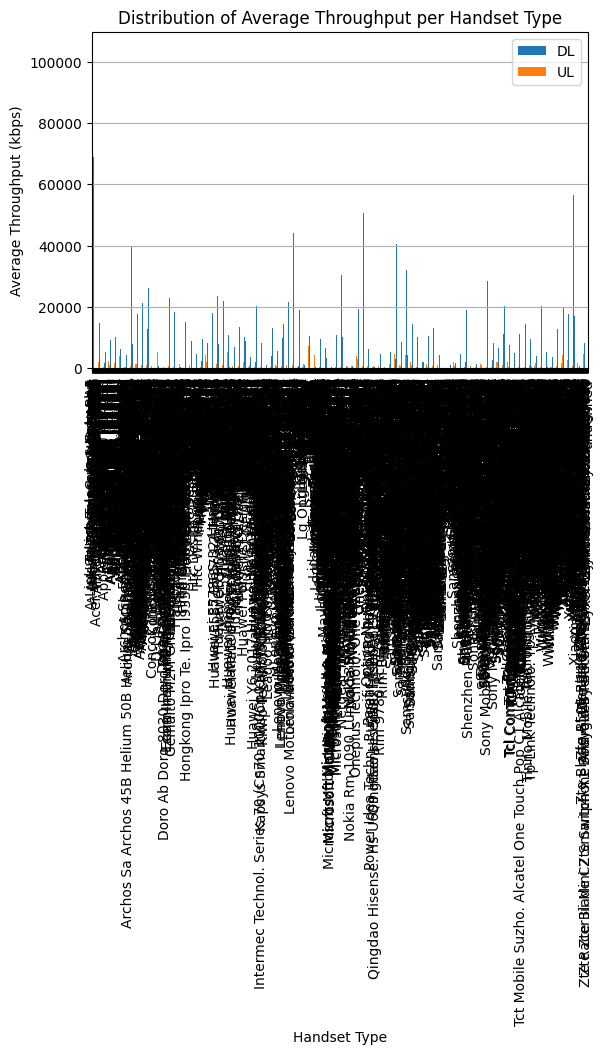

In [22]:
# Group the data by handset type and compute average throughput
average_throughput_per_handset = combined_df.groupby('Handset Type')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()

# Plot the distribution of average throughput per handset type
plt.figure(figsize=(16, 6))  # Increase the width of the figure
average_throughput_per_handset.plot(kind='bar', rot=90)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.grid(axis='y')
plt.legend(['DL', 'UL'])
plt.subplots_adjust(bottom=0.2, top=0.9) 
plt.show()

In [ ]:
# Group the data by handset type and compute average TCP retransmission volume
average_tcp_retransmission_per_handset = combined_df.groupby('Handset Type')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean()

# Plot the average TCP retransmission volume per handset type
plt.figure(figsize=(12, 6))
average_tcp_retransmission_per_handset.plot(kind='bar', rot=90)
plt.title('Average TCP Retransmission Volume per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission Volume (Bytes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate the information per customer
aggregated_info = combined_df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': 'first',  # Assuming each customer uses a single handset type
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

# Drop any rows with missing values
aggregated_info.dropna(inplace=True)

# Select the features for clustering
X = aggregated_info[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
                     'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                     'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the aggregated data
aggregated_info['Cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_characteristics = aggregated_info.groupby('Cluster').mean()

# Print the characteristics of each cluster
print(cluster_characteristics)